In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [3]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,15867,15868,15869,15870,15871,15872,15873,15874,15875,15876
0,0.342041,0.038682,0.088706,0.059924,0.342041,0.018378,0.004896,0.002618,0.148693,0.038381,...,0.246636,0.144258,0.000000,0.120241,0.278394,0.237860,0.014545,0.065407,0.160474,A
1,0.349647,0.007548,0.097359,0.003084,0.349647,0.019360,0.007125,0.006888,0.279283,0.045494,...,0.277066,0.072628,0.098131,0.180994,0.277066,0.110357,0.004801,0.006675,0.088028,A
2,0.258146,0.002453,0.081464,0.010058,0.331868,0.051616,0.022333,0.012189,0.331868,0.032548,...,0.286565,0.108151,0.170998,0.077285,0.252996,0.119032,0.015185,0.018037,0.108302,A
3,0.320103,0.065963,0.088352,0.016550,0.339426,0.014687,0.000000,0.003311,0.294246,0.048651,...,0.244985,0.090375,0.087494,0.143745,0.283442,0.055339,0.015946,0.002937,0.282549,A
4,0.332044,0.013120,0.105259,0.011201,0.332044,0.002077,0.010235,0.005569,0.245206,0.020814,...,0.258960,0.085897,0.122719,0.136595,0.258960,0.137030,0.038290,0.035591,0.118808,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,0.319964,0.004499,0.093250,0.001210,0.346148,0.004929,0.020672,0.003855,0.317436,0.020150,...,0.295100,0.077967,0.129247,0.084537,0.295100,0.131839,0.108562,0.039960,0.241550,Two
4320,0.335676,0.000977,0.070637,0.010773,0.335676,0.018790,0.004054,0.024501,0.257957,0.051261,...,0.265526,0.053415,0.091198,0.033682,0.293512,0.023429,0.030749,0.038022,0.269252,Two
4321,0.343803,0.004124,0.091553,0.050972,0.343803,0.014543,0.002463,0.021045,0.168152,0.028928,...,0.294289,0.057334,0.103625,0.145486,0.294289,0.037497,0.039368,0.032406,0.079643,Two
4322,0.344726,0.012260,0.091601,0.004720,0.344726,0.013278,0.002628,0.000885,0.161400,0.027760,...,0.303654,0.064472,0.066508,0.164194,0.303654,0.067052,0.018962,0.029933,0.093297,Two


In [4]:
df.columns = [*df.columns[:-1], 'Output']
df

,0,1,2,3,4,5,6,7,8,9,...,15867,15868,15869,15870,15871,15872,15873,15874,15875,Output
0,0.342041,0.038682,0.088706,0.059924,0.342041,0.018378,0.004896,0.002618,0.148693,0.038381,...,0.246636,0.144258,0.000000,0.120241,0.278394,0.237860,0.014545,0.065407,0.160474,A
1,0.349647,0.007548,0.097359,0.003084,0.349647,0.019360,0.007125,0.006888,0.279283,0.045494,...,0.277066,0.072628,0.098131,0.180994,0.277066,0.110357,0.004801,0.006675,0.088028,A
2,0.258146,0.002453,0.081464,0.010058,0.331868,0.051616,0.022333,0.012189,0.331868,0.032548,...,0.286565,0.108151,0.170998,0.077285,0.252996,0.119032,0.015185,0.018037,0.108302,A
3,0.320103,0.065963,0.088352,0.016550,0.339426,0.014687,0.000000,0.003311,0.294246,0.048651,...,0.244985,0.090375,0.087494,0.143745,0.283442,0.055339,0.015946,0.002937,0.282549,A
4,0.332044,0.013120,0.105259,0.011201,0.332044,0.002077,0.010235,0.005569,0.245206,0.020814,...,0.258960,0.085897,0.122719,0.136595,0.258960,0.137030,0.038290,0.035591,0.118808,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,0.319964,0.004499,0.093250,0.001210,0.346148,0.004929,0.020672,0.003855,0.317436,0.020150,...,0.295100,0.077967,0.129247,0.084537,0.295100,0.131839,0.108562,0.039960,0.241550,Two
4320,0.335676,0.000977,0.070637,0.010773,0.335676,0.018790,0.004054,0.024501,0.257957,0.051261,...,0.265526,0.053415,0.091198,0.033682,0.293512,0.023429,0.030749,0.038022,0.269252,Two
4321,0.343803,0.004124,0.091553,0.050972,0.343803,0.014543,0.002463,0.021045,0.168152,0.028928,...,0.294289,0.057334,0.103625,0.145486,0.294289,0.037497,0.039368,0.032406,0.079643,Two
4322,0.344726,0.012260,0.091601,0.004720,0.344726,0.013278,0.002628,0.000885,0.161400,0.027760,...,0.303654,0.064472,0.066508,0.164194,0.303654,0.067052,0.018962,0.029933,0.093297,Two


In [5]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (4324, 15876)
Labels shape = (4324,)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=0.9, probability=True, kernel='linear')
svm.fit(x_train, y_train)

SVC(C=0.9, kernel='linear', probability=True)

In [7]:
y_pred = svm.predict(x_test)
y_pred

array(['Four', 'One', 'I<3U', 'Four', 'L', 'One', 'B', 'OK', 'L', 'OK',
       'B', 'Three', 'Four', 'OK', 'A', 'S', 'One', 'L', 'C', 'One', 'L',
       'One', 'B', 'C', 'Four', 'I<3U', 'OK', 'Three', 'I<3U', 'B',
       'Four', 'B', 'Four', 'A', 'OK', 'A', 'Three', 'Two', 'C', 'Four',
       'S', 'S', 'A', 'L', 'Five', 'Five', 'Three', 'Five', 'OK', 'A',
       'Four', 'I<3U', 'OK', 'C', 'B', 'Five', 'Five', 'I<3U', 'Two',
       'Five', 'Three', 'OK', 'I<3U', 'I<3U', 'I<3U', 'Four', 'S', 'C',
       'S', 'Four', 'B', 'C', 'One', 'B', 'I<3U', 'A', 'Two', 'I<3U',
       'I<3U', 'C', 'S', 'C', 'OK', 'C', 'B', 'I<3U', 'One', 'I<3U',
       'Three', 'B', 'L', 'S', 'One', 'A', 'OK', 'Three', 'OK', 'I<3U',
       'Three', 'One', 'I<3U', 'One', 'One', 'A', 'Five', 'C', 'A', 'L',
       'L', 'Five', 'A', 'L', 'C', 'I<3U', 'I<3U', 'S', 'A', 'Three', 'L',
       'Three', 'A', 'A', 'C', 'B', 'Five', 'L', 'C', 'B', 'One', 'One',
       'C', 'Three', 'B', 'OK', 'S', 'C', 'I<3U', 'S', 'C', 'B', 'S'

In [12]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision
print("F1-score:",f1)
print("Recall:",recall)
print("Precision:",precision)

F1-score: 0.9988439306358381
Recall: 0.9988439306358381
Precision 0.9988439306358381


<Axes: title={'center': 'Confusion Matrix - American Sign Language (ASL)'}>

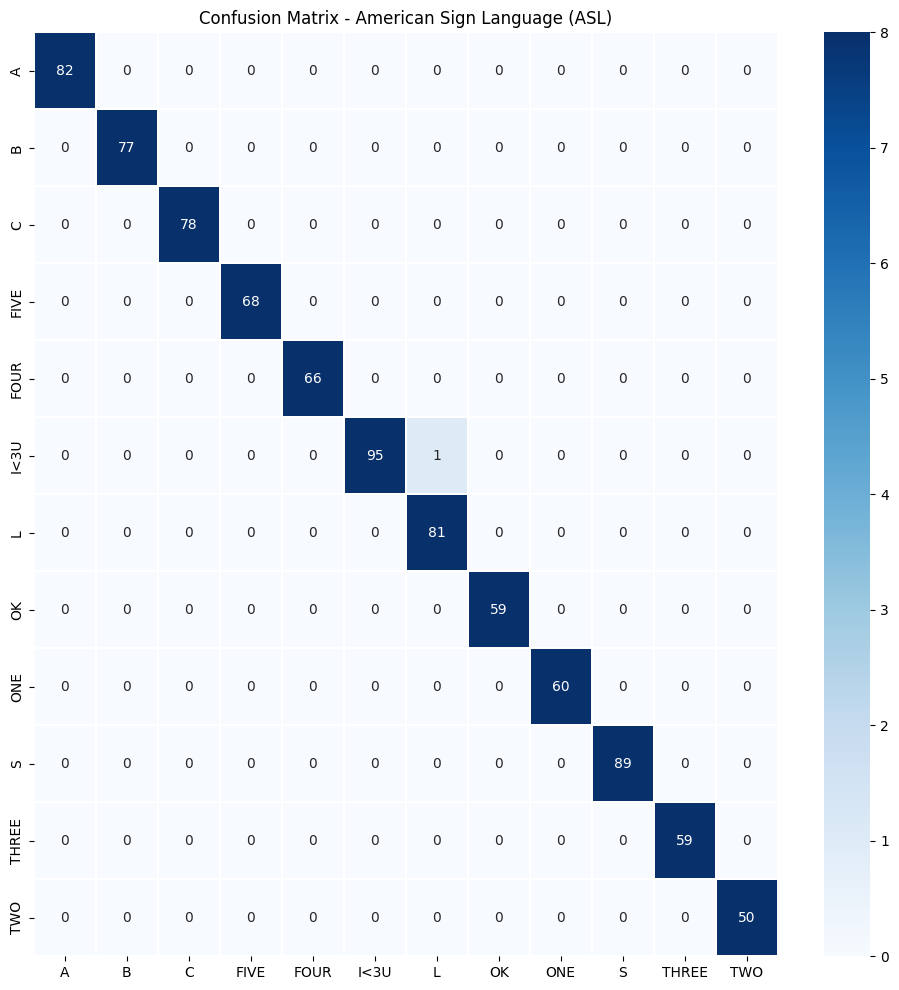

In [9]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language (ASL)")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [10]:
# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)